# Proyek Analisis Data: E-Commerce
- **Nama:** Yoga Samudra
- **Email:** 08samudra@gmail.com
- **ID Dicoding:** 08samudra

## Menentukan Pertanyaan Bisnis



1.   Berapa rata-rata waktu yang dibutuhkan untuk pengiriman pesanan hingga sampai ke tangan pelanggan pada tahun 2017 dan 2018?
2.   Berapa banyak pesanan yang dibatalkan atau tidak tersedia pada tahun 2018, dan apakah ada jenis produk atau penjual tertentu yang sering mengalami masalah ini?
3.   Lima kategori produk teratas apa saja yang menjadi penyumbang pendapatan terbesar perusahaan secara konsisten setiap tiga bulan (kuartal) di tahun 2017 dan 2018?





## Import Semua Packages/Library yang Digunakan

In [1]:
%pip install squarify
import squarify
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


## Data Wrangling

### Gathering Data

In [2]:
customers = pd.read_csv("datasets/customers_dataset.csv")
geolocation = pd.read_csv("datasets/geolocation_dataset.csv")
order_items = pd.read_csv("datasets/order_items_dataset.csv")
order_payments = pd.read_csv("datasets/order_payments_dataset.csv")
order_reviews = pd.read_csv("datasets/order_reviews_dataset.csv")
orders = pd.read_csv("datasets/orders_dataset.csv")
product_category_name_translation = pd.read_csv("datasets/product_category_name_translation.csv")
products = pd.read_csv("datasets/products_dataset.csv")
sellers = pd.read_csv("datasets/sellers_dataset.csv")

**Insight:**
Berdasarkan data yang diimport, kita akan menggunakan dataset sebagai berikut, untuk menjadi pertanyaan yang telah didefinisikan.
- customers,
- order_items,
- orders,
- order_payments, dan
- products

### Assessing Data

In [3]:
# =========================
# 📋 Assessing Data
# =========================

import pandas as pd

# Daftar dataset yang akan diperiksa
datasets = {
    "customers": customers,
    "order_items": order_items,
    "orders": orders,
    "order_payments": order_payments,
    "products": products
}

# Fungsi untuk melakukan pengecekan dasar pada setiap dataset
for name, df in datasets.items():
    print(f"📘 Dataset: {name.upper()}")
    print("-" * 50)

    # 1. Info Tipe Data
    print("🔎 Info Tipe Data:")
    display(df.info())

    # 2. Jumlah Duplikasi
    duplicate_count = df.duplicated().sum()
    print(f"📌 Jumlah Duplikasi: {duplicate_count}")

    # 3. Jumlah Nilai Hilang
    missing_values = df.isnull().sum()
    print("⚠️ Jumlah Nilai Hilang per Kolom:")
    display(missing_values[missing_values > 0])

    print("\n" + "=" * 60 + "\n")


📘 Dataset: CUSTOMERS
--------------------------------------------------
🔎 Info Tipe Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


None

📌 Jumlah Duplikasi: 0
⚠️ Jumlah Nilai Hilang per Kolom:


Series([], dtype: int64)



📘 Dataset: ORDER_ITEMS
--------------------------------------------------
🔎 Info Tipe Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


None

📌 Jumlah Duplikasi: 0
⚠️ Jumlah Nilai Hilang per Kolom:


Series([], dtype: int64)



📘 Dataset: ORDERS
--------------------------------------------------
🔎 Info Tipe Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


None

📌 Jumlah Duplikasi: 0
⚠️ Jumlah Nilai Hilang per Kolom:


order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
dtype: int64



📘 Dataset: ORDER_PAYMENTS
--------------------------------------------------
🔎 Info Tipe Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


None

📌 Jumlah Duplikasi: 0
⚠️ Jumlah Nilai Hilang per Kolom:


Series([], dtype: int64)



📘 Dataset: PRODUCTS
--------------------------------------------------
🔎 Info Tipe Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


None

📌 Jumlah Duplikasi: 0
⚠️ Jumlah Nilai Hilang per Kolom:


product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

### Cleaning Data

#### Membersihkan tabel customers_df

In [4]:
# 1. Muat dataset customers
customers_df = pd.read_csv('datasets/customers_dataset.csv')

print("--- Data Cleaning untuk customers_dataset.csv ---")

# 2. Lihat Informasi Dasar
print("\nInformasi DataFrame customers_df:")
customers_df.info()

# 3. Cek Nilai Hilang
print("\nJumlah nilai hilang di customers_df:")
print(customers_df.isnull().sum())

# 4. Cek Duplikasi Baris
print("\nJumlah duplikasi baris di customers_df:")
print(customers_df.duplicated().sum())

# 5. Describe customers_df
print("\n--- Hasil Describe customers_dataset.csv ---")
customers_df.describe()

--- Data Cleaning untuk customers_dataset.csv ---

Informasi DataFrame customers_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

Jumlah nilai hilang di customers_df:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Jumlah duplikasi baris di customers_df:
0

--- Hasil Describe customers_dataset.csv ---


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Membersihkan tabel order_items_df

In [5]:
# 1. Muat dataset order_items
order_items_df = pd.read_csv('datasets/order_items_dataset.csv')

print("\n\n--- Data Cleaning untuk order_items_dataset.csv ---")

# 2. Lihat Informasi Dasar
print("\nInformasi DataFrame order_items_df:")
order_items_df.info()

# 3. Cek Nilai Hilang
print("\nJumlah nilai hilang di order_items_df:")
print(order_items_df.isnull().sum())

# 4. Cek Duplikasi Baris
print("\nJumlah duplikasi baris di order_items_df:")
print(order_items_df.duplicated().sum())

# 5. Describe order_items_df
print("\n--- Hasil Describe order_items.csv ---")
order_items_df.describe()



--- Data Cleaning untuk order_items_dataset.csv ---

Informasi DataFrame order_items_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB

Jumlah nilai hilang di order_items_df:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Jumlah duplikasi baris di order_items_df:
0

--- 

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Membersihkan tabel orders_df

In [6]:
# 1. Muat dataset orders
orders_df = pd.read_csv('datasets/orders_dataset.csv')

print("\n\n--- Data Cleaning untuk orders_dataset.csv ---")

# 2. Lihat Informasi Dasar (sebelum cleaning)
print("\nInformasi DataFrame orders_df (Sebelum Cleaning):")
orders_df.info()

# 3. Cek Nilai Hilang (sebelum cleaning)
print("\nJumlah nilai hilang di orders_df (Sebelum Cleaning):")
print(orders_df.isnull().sum())

# 4. Cek Duplikasi Baris
print("\nJumlah duplikasi baris di orders_df:")
print(orders_df.duplicated().sum())

# 5. Lakukan Pembersihan untuk orders_df
print("\n--- Melakukan Pembersihan orders_dataset.csv ---")
# Mengubah kolom tanggal menjadi tipe datetime
date_columns_to_convert = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
for col in date_columns_to_convert:
    if col in orders_df.columns:
        orders_df[col] = pd.to_datetime(orders_df[col], errors='coerce') # 'coerce' akan mengubah data yang tidak valid menjadi NaT (Not a Time)
        print(f"  Kolom '{col}' telah diubah ke tipe datetime.")

# Setelah dikonversi, cek lagi nilai hilang. NaT dianggap sebagai nilai hilang.
print("\nJumlah nilai hilang di orders_df (Setelah Konversi Datetime):")
print(orders_df.isnull().sum())

# Untuk nilai hilang pada tanggal pengiriman, kita akan biarkan dulu untuk EDA.
# Menghapus baris yang memiliki nilai hilang di kolom tanggal pengiriman bisa dilakukan
# jika kita hanya ingin menganalisis pesanan yang benar-benar terkirim lengkap.
# Untuk saat ini, kita biarkan saja dan catat adanya nilai hilang ini.

# 6. Describe orders_df
print("\n--- Hasil Describe orders_dataset.csv ---")
orders_df.describe()



--- Data Cleaning untuk orders_dataset.csv ---

Informasi DataFrame orders_df (Sebelum Cleaning):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

Jumlah nilai hilang di orders_df (Sebelum Cleaning):
order_id                            0
customer_id                         0
order_status                    

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99281,97658,96476,99441
mean,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


#### Membersihkan tabel order_payments_df

In [7]:
# 1. Muat dataset order_payments
order_payments_df = pd.read_csv('datasets/order_payments_dataset.csv')

print("\n\n--- Data Cleaning untuk order_payments_dataset.csv ---")

# 2. Lihat Informasi Dasar
print("\nInformasi DataFrame order_payments_df:")
order_payments_df.info()

# 3. Cek Nilai Hilang
print("\nJumlah nilai hilang di order_payments_df:")
print(order_payments_df.isnull().sum())

# 4. Cek Duplikasi Baris
print("\nJumlah duplikasi baris di order_payments_df:")
print(order_payments_df.duplicated().sum())

# 5. Describe order_payments_df
print("\n--- Hasil Describe order_payments.csv ---")
order_payments_df.describe()



--- Data Cleaning untuk order_payments_dataset.csv ---

Informasi DataFrame order_payments_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB

Jumlah nilai hilang di order_payments_df:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Jumlah duplikasi baris di order_payments_df:
0

--- Hasil Describe order_payments.csv ---


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### Membersihkan tabel products_df

In [8]:
# 1. Muat dataset products
products_df = pd.read_csv('datasets/products_dataset.csv')

print("\n\n--- Data Cleaning untuk products_dataset.csv ---")

# 2. Lihat Informasi Dasar (sebelum cleaning)
print("\nInformasi DataFrame products_df (Sebelum Cleaning):")
products_df.info()

# 3. Cek Nilai Hilang (sebelum cleaning)
print("\nJumlah nilai hilang di products_df (Sebelum Cleaning):")
print(products_df.isnull().sum())

# 4. Cek Duplikasi Baris
print("\nJumlah duplikasi baris di products_df:")
print(products_df.duplicated().sum())

# 5. Lakukan Pembersihan untuk products_df
print("\n--- Melakukan Pembersihan products_dataset.csv ---")

# Hindari FutureWarning dengan menyalin DataFrame
products_df = products_df.copy()

# Mengisi nilai hilang di 'product_category_name' dengan 'unknown_category'
if 'product_category_name' in products_df.columns:
    products_df['product_category_name'] = products_df['product_category_name'].fillna('unknown_category')
    print("  Nilai hilang di 'product_category_name' diisi dengan 'unknown_category'.")

# Mengisi nilai hilang pada kolom numerik dengan median (tanpa inplace)
numerical_product_desc_cols = [
    'product_name_lenght', 'product_description_lenght', 'product_photos_qty',
    'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'
]
for col in numerical_product_desc_cols:
    if col in products_df.columns and products_df[col].isnull().any():
        median_value = products_df[col].median()
        products_df[col] = products_df[col].fillna(median_value)
        print(f"  Nilai hilang di '{col}' diisi dengan median ({median_value}).")

# Cek lagi nilai hilang setelah pembersihan
print("\nJumlah nilai hilang di products_df (Setelah Cleaning):")
print(products_df.isnull().sum())

# 6. Describe products_df
print("\n--- Hasil Describe products.csv ---")
products_df.describe()




--- Data Cleaning untuk products_dataset.csv ---

Informasi DataFrame products_df (Sebelum Cleaning):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB

Jumlah nilai hilang di products_df (Sebelum Cleaning):
product_id                      0
product_category_na

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,48.523656,768.227945,2.166975,2276.376802,30.814725,16.937422,23.196534
std,10.156155,629.658469,1.728063,4281.926387,16.914005,13.637175,12.078707
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


## Exploratory Data Analysis (EDA)

### Explore Data per Dataset

1. Explore customers

In [9]:
print("Hasil customers_df.sample(5)")
print(customers_df.sample(5))

Hasil customers_df.sample(5)
                            customer_id                customer_unique_id  \
59505  98633d385a625996e77868705db2169f  7f35a871b3a7a11a8cec451cbda0edcb   
17335  1dbf434ac2c0271c0a5222be25c8fe62  a98127f5902b8118fd702de874f1287c   
87367  b95975b682b09a1890557a1ab4021873  67031f3c7bc5f28dd7b6344294b4ffec   
61424  8de64fc8fa179ff773b31c717f5fc995  dc0274a25d881c813da7d55b7faace37   
68260  d8b65951c84554c80270720c9b5f1178  c6c805ba1449708b259b6da9375318ec   

       customer_zip_code_prefix customer_city customer_state  
59505                     27933         macae             RJ  
17335                     79602   tres lagoas             MS  
87367                     65895        loreto             MA  
61424                     67133    ananindeua             PA  
68260                     13201       jundiai             SP  


In [10]:
print("Hasil: customers_df['customer_unique_id'].nunique()")
print(f"Jumlah customer_unique_id (pelanggan unik): {customers_df['customer_unique_id'].nunique()}")

Hasil: customers_df['customer_unique_id'].nunique()
Jumlah customer_unique_id (pelanggan unik): 96096


In [11]:
print("Hasil: customers_df['customer_id'].nunique()")
print(f"Jumlah customer_id (ID pelanggan): {customers_df['customer_id'].nunique()}")

Hasil: customers_df['customer_id'].nunique()
Jumlah customer_id (ID pelanggan): 99441


Penjelasan: Dari data tersebut menunjukkan bahwa ada lebih banyak customer_id daripada customer_unique_id. Ini berarti beberapa pelanggan unik telah memiliki beberapa customer_id yang berbeda, kemungkinan karena beberapa pesanan atau perubahan identitas.

In [12]:
print("Hasil: customers_df['customer_city'].value_counts().head(10)")
top_cities_customers = customers_df['customer_city'].value_counts().head(10)
print(top_cities_customers)

Hasil: customers_df['customer_city'].value_counts().head(10)
customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: count, dtype: int64


Penjelasan: Sao Paulo adalah kota dengan jumlah pelanggan terbanyak, mengindikasikan penjualan yang tinggi di sana.

In [13]:
print("Hasil: customers_df['customer_state'].value_counts().head(10)")
top_states_customers = customers_df['customer_state'].value_counts().head(10)
print(top_states_customers)
print("")

Hasil: customers_df['customer_state'].value_counts().head(10)
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: count, dtype: int64



Penjelasan: Negara bagian SP (São Paulo) adalah yang paling dominan.

2. Explore order_items

In [14]:
print("Hasil: order_items_df.sample(5)")
print(order_items_df.sample(5))

Hasil: order_items_df.sample(5)
                                order_id  order_item_id  \
74593   a9eec2aaf2814129ba011047ae8484b6              2   
1947    046afc54df6dd8bc98ee2c0e653b70d8              1   
11099   193c1dc57175afe8abd16a370d264fcd              1   
90753   ce22c4e0009f3c42ea02d36a32e2b91b              1   
106423  f1e00063e81b3f4c37e7beb4280d0f91              1   

                              product_id                         seller_id  \
74593   509869967faff93ff8a7a229abed8641  602044f2c16190c2c6e45eb35c2e21cb   
1947    2136c70bbe723d338fab53da3c03e6dc  6560211a19b47992c3666cc44a7e94c0   
11099   a8fe47ad6f852f93cc92c7b408687de3  aaed1309374718fdd995ee4c58c9dfcd   
90753   4ee931ba1980085a969d498d63e69f72  d1c281d3ae149232351cd8c8cc885f0d   
106423  4bdceb4d305fae441dc42d7788a57f75  218d46b86c1881d022bce9c68a7d4b15   

        shipping_limit_date  price  freight_value  
74593   2018-04-08 21:09:30  79.99          13.43  
1947    2017-07-09 23:23:27  29.00      

Penjelasan: Menampilkan rincian item dalam pesanan, termasuk ID produk, ID penjual, harga, dan biaya pengiriman.

In [15]:
print("Hasil: order_items_df[['price', 'freight_value']].describe()")
print(order_items_df[['price', 'freight_value']].describe())

Hasil: order_items_df[['price', 'freight_value']].describe()
               price  freight_value
count  112650.000000  112650.000000
mean      120.653739      19.990320
std       183.633928      15.806405
min         0.850000       0.000000
25%        39.900000      13.080000
50%        74.990000      16.260000
75%       134.900000      21.150000
max      6735.000000     409.680000


Penjelasan: Rata-rata harga produk tercatat sekitar R120, dengan variasi yang cukup besar hingga mencapai R6.735, yang mengindikasikan adanya produk premium atau kemungkinan outlier dalam data.

In [16]:
print("Hasil: order_items_df['product_id'].value_counts().head(10)")
top_products_ordered = order_items_df['product_id'].value_counts().head(10)
print(top_products_ordered)

Hasil: order_items_df['product_id'].value_counts().head(10)
product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
53759a2ecddad2bb87a079a1f1519f73    373
d1c427060a0f73f6b889a5c7c61f2ac4    343
53b36df67ebb7c41585e8d54d6772e08    323
154e7e31ebfa092203795c972e5804a6    281
3dd2a17168ec895c781a9191c1e95ad7    274
Name: count, dtype: int64


Penjelasan: Menunjukkan ID produk yang paling sering muncul di pesanan, mengindikasikan produk terlaris.

In [17]:
print("Hasil: order_items_df['seller_id'].value_counts().head(10)")
top_sellers_items = order_items_df['seller_id'].value_counts().head(10)
print(top_sellers_items)

Hasil: order_items_df['seller_id'].value_counts().head(10)
seller_id
6560211a19b47992c3666cc44a7e94c0    2033
4a3ca9315b744ce9f8e9374361493884    1987
1f50f920176fa81dab994f9023523100    1931
cc419e0650a3c5ba77189a1882b7556a    1775
da8622b14eb17ae2831f4ac5b9dab84a    1551
955fee9216a65b617aa5c0531780ce60    1499
1025f0e2d44d7041d6cf58b6550e0bfa    1428
7c67e1448b00f6e969d365cea6b010ab    1364
ea8482cd71df3c1969d7b9473ff13abc    1203
7a67c85e85bb2ce8582c35f2203ad736    1171
Name: count, dtype: int64


Penjelasan: Menampilkan ID penjual yang paling banyak menjual item.

###3. Explore orders

In [18]:
print("Hasil: orders_df.sample(5)")
print(orders_df.sample(5))

Hasil: orders_df.sample(5)
                               order_id                       customer_id  \
2318   91f71835acd6d20c6c5362c5c1907367  ef6fffb44c4dd02c0e35d6b6f9acf31e   
90121  683481ae11f5f4ccfd9263a3bd7f25d4  38e26bdd2add60a638859e52ea718cf2   
92950  6542055e71e2ba285676fe57d0822618  1fe381f4b615df3b145782822bc200af   
24244  6a4ce4b6c9db497b72fc7446e987ffb7  675149f38575f85aeb539721c522692f   
61179  6bfac9a0bcb72747337ef88822279264  b19eacac05a3fa6c61ea12d1a138e048   

      order_status order_purchase_timestamp   order_approved_at  \
2318     delivered      2018-06-02 16:58:03 2018-06-02 17:10:22   
90121    delivered      2018-06-21 11:12:14 2018-06-22 15:20:36   
92950    delivered      2018-03-13 13:33:43 2018-03-13 14:28:32   
24244    delivered      2017-05-03 09:33:59 2017-05-04 10:25:17   
61179    delivered      2018-02-12 22:46:28 2018-02-12 23:08:06   

      order_delivered_carrier_date order_delivered_customer_date  \
2318           2018-06-04 11:06:00     

Penjelasan: Menampilkan ID pesanan, ID pelanggan, status pesanan, dan berbagai tanggal/waktu terkait pesanan.

In [19]:
print("Hasil: orders_df['order_status'].value_counts()")
order_status_counts = orders_df['order_status'].value_counts()
print(order_status_counts)

Hasil: orders_df['order_status'].value_counts()
order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


Penjelasan: Sebagian besar pesanan memiliki status 'delivered', menunjukkan tingkat penyelesaian pesanan yang tinggi.

In [20]:
print("Hasil: orders_df['order_purchase_timestamp'].min(), orders_df['order_purchase_timestamp'].max()")
earliest_purchase = orders_df['order_purchase_timestamp'].min()
latest_purchase = orders_df['order_purchase_timestamp'].max()
print(f"Tanggal pembelian terawal: {earliest_purchase}")
print(f"Tanggal pembelian terbaru: {latest_purchase}")

Hasil: orders_df['order_purchase_timestamp'].min(), orders_df['order_purchase_timestamp'].max()
Tanggal pembelian terawal: 2016-09-04 21:15:19
Tanggal pembelian terbaru: 2018-10-17 17:30:18


Penjelasan: Menunjukkan rentang waktu data pesanan yang tersedia.

In [21]:
delivered_orders = orders_df[
    (orders_df['order_status'] == 'delivered') &
    (orders_df['order_delivered_customer_date'].notna()) &
    (orders_df['order_purchase_timestamp'].notna())
].copy()


delivered_orders['delivery_duration_days'] = (
    delivered_orders['order_delivered_customer_date'] - delivered_orders['order_purchase_timestamp']
).dt.days
delivered_orders = delivered_orders[delivered_orders['delivery_duration_days'] >= 0]

print("Hasil: delivered_orders['delivery_duration_days'].describe()")
print(delivered_orders['delivery_duration_days'].describe())

Hasil: delivered_orders['delivery_duration_days'].describe()
count    96470.000000
mean        12.093604
std          9.551380
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: delivery_duration_days, dtype: float64


Penjelasan: Rata-rata pesanan tiba dalam sekitar 12 hari. Ada pesanan yang tiba di hari yang sama (min 0) dan ada juga yang sangat lama (max 209 hari).

###4. Explore order_payments

In [22]:
print("Hasil: order_payments_df.sample(5)")
print(order_payments_df.sample(5))

Hasil: order_payments_df.sample(5)
                               order_id  payment_sequential payment_type  \
29992  84efa035e6e5705e9a028f381e668b62                   1  credit_card   
44440  127f6cc9849c481c4f0daf043a91a129                   1  credit_card   
96786  b3bab804c76ad164c8aba19684f85e38                   1       boleto   
90248  b6a006c82e0dea4214b534ced51eb9bd                   1  credit_card   
56568  fbae70a32d0f68cc7c48d802e69ecb7d                   1  credit_card   

       payment_installments  payment_value  
29992                     6         346.60  
44440                     1         517.72  
96786                     1         124.27  
90248                     4          98.65  
56568                     5         128.45  


Penjelasan: Menampilkan rincian pembayaran, termasuk ID pesanan, tipe pembayaran, jumlah cicilan, dan nilai pembayaran.

In [23]:
print("Hasil: order_payments_df['payment_type'].value_counts()")
payment_type_counts = order_payments_df['payment_type'].value_counts()
print(payment_type_counts)

Hasil: order_payments_df['payment_type'].value_counts()
payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


Penjelasan: Kartu kredit adalah metode pembayaran paling populer, diikuti oleh boleto. Ada juga beberapa transaksi 'not_defined' yang perlu diperhatikan.

In [24]:
print("Hasil: order_payments_df['payment_installments'].value_counts().sort_index().head(10)")
payment_installments_dist = order_payments_df['payment_installments'].value_counts().sort_index().head(10)
print(payment_installments_dist)

Hasil: order_payments_df['payment_installments'].value_counts().sort_index().head(10)
payment_installments
0        2
1    52546
2    12413
3    10461
4     7098
5     5239
6     3920
7     1626
8     4268
9      644
Name: count, dtype: int64


Penjelasan: Sebagian besar pembayaran dilakukan dalam 1x cicilan, namun pembayaran dengan cicilan 2x, 3x, dan seterusnya juga cukup sering terjadi, terutama untuk kartu kredit. Ada 2 transaksi dengan 0 cicilan yang perlu diperiksa lebih lanjut jika ini adalah anomali.

In [25]:
print("Hasil: order_payments_df['payment_value'].describe()")
print(order_payments_df['payment_value'].describe())

Hasil: order_payments_df['payment_value'].describe()
count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64


Penjelasan: Rata-rata nilai pembayaran sekitar R 154, dengan nilai maksimum yang sangat tinggi (R 13664), menunjukkan adanya pesanan bernilai sangat tinggi. Ada juga pembayaran dengan nilai 0 yang mungkin perlu ditinjau.

In [26]:
print("Hasil: order_payments_df.groupby('payment_type')['payment_value'].sum().sort_values(ascending=False)")
total_payment_by_type = order_payments_df.groupby('payment_type')['payment_value'].sum().sort_values(ascending=False)
print(total_payment_by_type)

Hasil: order_payments_df.groupby('payment_type')['payment_value'].sum().sort_values(ascending=False)
payment_type
credit_card    12542084.19
boleto          2869361.27
voucher          379436.87
debit_card       217989.79
not_defined           0.00
Name: payment_value, dtype: float64


Penjelasan: Kartu kredit menyumbang pendapatan terbesar, jauh melebihi metode pembayaran lain. Ini mengkonfirmasi dominasinya dalam volume dan nilai transaksi.

###5. Explore products

In [27]:
print("Hasil: products_df.sample(5)")
print(products_df.sample(5))

Hasil: products_df.sample(5)
                             product_id   product_category_name  \
8912   11da471af2f5c0214e3d5fd7433a6350      relogios_presentes   
17248  56cdfe67fbda57c1dcc752f5f361f981  informatica_acessorios   
28128  acf90725a7a1fa2b5f4f0d77da84403b             eletronicos   
9226   a14f93c69d3e0d7482819dd023a1d2cd  informatica_acessorios   
32085  1b4a4a283a036d1473ff5be2a0d493a2         cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
8912                  58.0                      2038.0                 2.0   
17248                 60.0                       511.0                 1.0   
28128                 56.0                       770.0                 1.0   
9226                  57.0                       100.0                 2.0   
32085                 53.0                      1299.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
8912              850.0           

Penjelasan: Menampilkan ID produk, nama kategori produk, dan berbagai dimensi serta kuantitas foto produk.

In [28]:
print("Hasil: products_df['product_category_name'].value_counts().head(10)")
top_product_categories = products_df['product_category_name'].value_counts().head(10)
print(top_product_categories)

Hasil: products_df['product_category_name'].value_counts().head(10)
product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: count, dtype: int64


Penjelasan: Menunjukkan kategori produk yang paling banyak terwakili dalam dataset, ini bukan penjualan tapi jumlah produk unik di kategori tersebut.

In [29]:
numerical_product_cols_to_fill = [
    'product_name_lenght', 'product_description_lenght', 'product_photos_qty',
    'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'
]
print("Hasil: products_df[numerical_product_cols_to_fill].describe()")
print(products_df[numerical_product_cols_to_fill].describe())

Hasil: products_df[numerical_product_cols_to_fill].describe()
       product_name_lenght  product_description_lenght  product_photos_qty  \
count         32951.000000                32951.000000        32951.000000   
mean             48.523656                  768.227945            2.166975   
std              10.156155                  629.658469            1.728063   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  344.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  961.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32951.000000       32951.000000       32951.000000   
mean        2276.376802          30.814725          16.937422   
std         4281.926387          16.9140

Penjelasan: Memberikan gambaran statistik tentang panjang nama/deskripsi produk, jumlah foto, serta berat dan dimensi produk. Ini berguna untuk memahami karakteristik fisik produk yang dijual.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Berapa rata-rata waktu yang dibutuhkan untuk pengiriman pesanan hingga sampai ke tangan pelanggan pada tahun 2017 dan 2018?

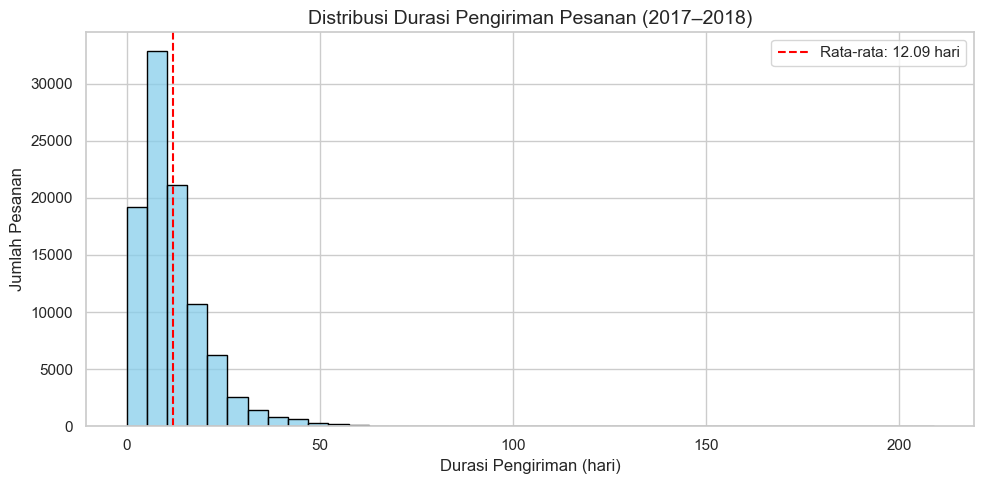

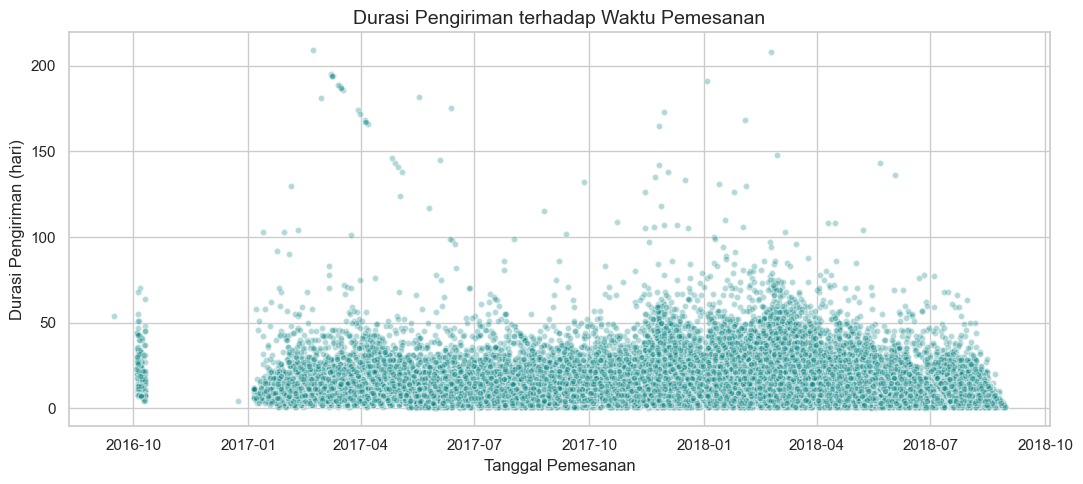

In [30]:
# Tema
sns.set(style='whitegrid')

# Hitung rata-rata durasi pengiriman
avg = delivered_orders['delivery_duration_days'].mean()

# --- Histogram Durasi Pengiriman ---
plt.figure(figsize=(10, 5))
sns.histplot(delivered_orders['delivery_duration_days'], bins=40, color='skyblue', edgecolor='black')
plt.axvline(avg, color='red', linestyle='--', label=f'Rata-rata: {avg:.2f} hari')
plt.title('Distribusi Durasi Pengiriman Pesanan (2017–2018)', fontsize=14)
plt.xlabel('Durasi Pengiriman (hari)', fontsize=12)
plt.ylabel('Jumlah Pesanan', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# --- Scatter Plot antara Tanggal Pemesanan dan Durasi Pengiriman ---
plt.figure(figsize=(11, 5))
plt.scatter(
    delivered_orders['order_purchase_timestamp'],
    delivered_orders['delivery_duration_days'],
    alpha=0.3,
    color='teal',
    edgecolors='w',
    s=20
)
plt.title('Durasi Pengiriman terhadap Waktu Pemesanan', fontsize=14)
plt.xlabel('Tanggal Pemesanan', fontsize=12)
plt.ylabel('Durasi Pengiriman (hari)', fontsize=12)
plt.tight_layout()
plt.show()


### Pertanyaan 2:
Berapa banyak pesanan yang dibatalkan atau tidak tersedia pada tahun 2018, dan apakah ada jenis produk atau penjual tertentu yang sering mengalami masalah ini?

Jumlah total pesanan bermasalah (canceled/unavailable) pada tahun 2018: 479 pesanan.

10 Kategori Produk Teratas yang Terkait dengan Pesanan Bermasalah (2018):
product_category_name
beleza_saude              27
utilidades_domesticas     26
informatica_acessorios    25
esporte_lazer             24
moveis_decoracao          20
brinquedos                16
bebes                     15
cama_mesa_banho           11
eletronicos               10
automotivo                 9
Name: count, dtype: int64 



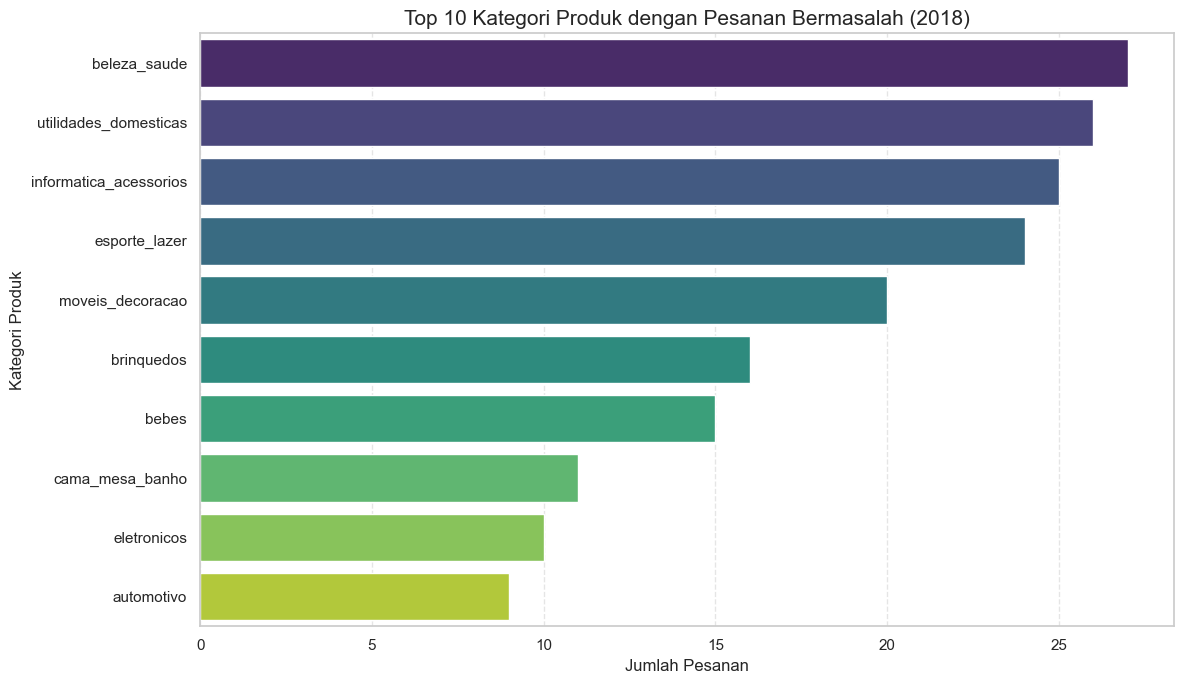

10 Penjual Teratas yang Terkait dengan Pesanan Bermasalah (2018):
seller_id
cc419e0650a3c5ba77189a1882b7556a    9
6560211a19b47992c3666cc44a7e94c0    6
81783131d2a97c8d44d406a4be81b5d9    6
8a32e327fe2c1b3511609d81aaf9f042    6
855668e0971d4dfd7bef1b6a4133b41b    5
c3867b4666c7d76867627c2f7fb22e21    5
73a63f72308aa20a46f4b1632018f196    5
90d4125885ab6c86e8820a722be71974    5
c4f7fee5b0db50e87766f5a4d1b1b758    4
6973a06f484aacf400ece213dbf3d946    4
Name: count, dtype: int64 



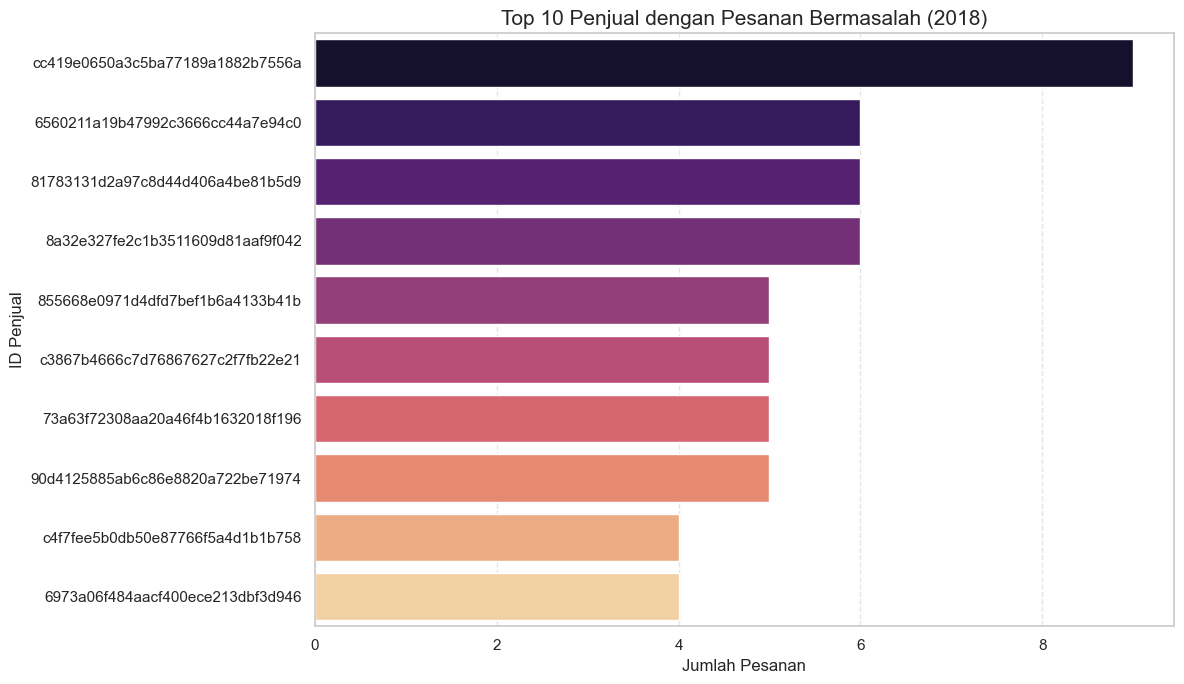

In [31]:
problematic_orders_2018 = orders_df[
    (orders_df['order_purchase_timestamp'].dt.year == 2018) &
    (orders_df['order_status'].isin(['canceled', 'unavailable']))
].copy()

total_problematic_orders = problematic_orders_2018.shape[0]
print(f"Jumlah total pesanan bermasalah (canceled/unavailable) pada tahun 2018: {total_problematic_orders} pesanan.\n")

problematic_orders_merged = pd.merge(
    problematic_orders_2018,
    order_items_df,
    on='order_id',
    how='inner'
)


problematic_orders_merged = pd.merge(
    problematic_orders_merged,
    products_df[['product_id', 'product_category_name']],
    on='product_id',
    how='left'
)


top_problem_categories = problematic_orders_merged['product_category_name'].value_counts().head(10)

print("10 Kategori Produk Teratas yang Terkait dengan Pesanan Bermasalah (2018):")
print(top_problem_categories, "\n")

# Visualisasi Top 10 Kategori Produk
plt.figure(figsize=(12, 7))
sns.barplot(
    x=top_problem_categories.values,
    y=top_problem_categories.index,
    hue=top_problem_categories.index,
    dodge=False,
    palette='viridis',
    legend=False
)
plt.title('Top 10 Kategori Produk dengan Pesanan Bermasalah (2018)', fontsize=15)
plt.xlabel('Jumlah Pesanan', fontsize=12)
plt.ylabel('Kategori Produk', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



top_problem_sellers = problematic_orders_merged['seller_id'].value_counts().head(10)

print("10 Penjual Teratas yang Terkait dengan Pesanan Bermasalah (2018):")
print(top_problem_sellers, "\n")

# Visualisasi Top 10 Seller ID
plt.figure(figsize=(12, 7))
sns.barplot(
    x=top_problem_sellers.values,
    y=top_problem_sellers.index,
    hue=top_problem_sellers.index,
    dodge=False,
    palette='magma',
    legend=False
)
plt.title('Top 10 Penjual dengan Pesanan Bermasalah (2018)', fontsize=15)
plt.xlabel('Jumlah Pesanan', fontsize=12)
plt.ylabel('ID Penjual', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Pertanyaan 3:
Lima kategori produk teratas apa saja yang menjadi penyumbang pendapatan terbesar perusahaan secara konsisten setiap tiga bulan (kuartal) di tahun 2017 dan 2018?


Top 5 Kategori Produk berdasarkan Pendapatan per Kuartal (2017 & 2018):
     year  quarter   product_category_name  payment_value
43   2017        1        moveis_decoracao      105553.51
26   2017        1           esporte_lazer       77727.48
33   2017        1      ferramentas_jardim       76302.95
8    2017        1            beleza_saude       75676.80
10   2017        1         cama_mesa_banho       73942.70
98   2017        2  informatica_acessorios      169424.80
72   2017        2         cama_mesa_banho      133933.29
70   2017        2            beleza_saude      131429.28
88   2017        2           esporte_lazer      130742.89
108  2017        2        moveis_decoracao      121334.57
138  2017        3         cama_mesa_banho      269500.52
167  2017        3  informatica_acessorios      195851.41
157  2017        3           esporte_lazer      193622.92
136  2017        3            beleza_saude      178266.57
177  2017        3        moveis_decoracao      171769.33

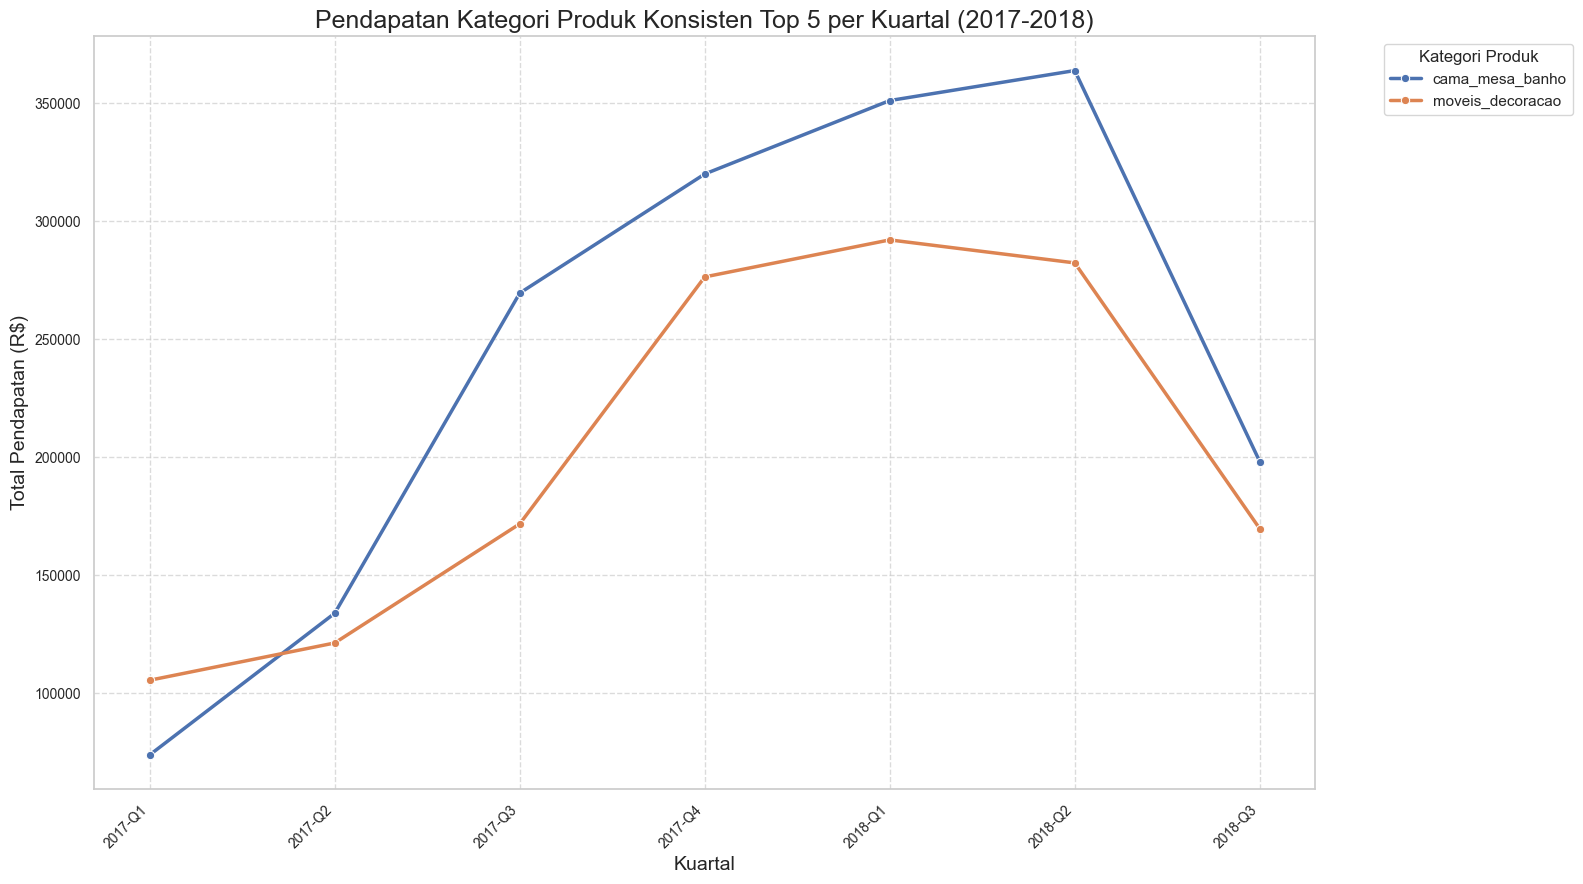

In [32]:
orders_payments_df = pd.merge(orders_df, order_payments_df, on='order_id', how='inner')

orders_payments_items_df = pd.merge(orders_payments_df, order_items_df, on='order_id', how='inner')

full_data_df = pd.merge(orders_payments_items_df, products_df[['product_id', 'product_category_name']], on='product_id', how='left')

# Filter data untuk tahun 2017 dan 2018
filtered_data = full_data_df[full_data_df['order_purchase_timestamp'].dt.year.isin([2017, 2018])].copy()

# Ekstrak tahun dan kuartal
filtered_data['year'] = filtered_data['order_purchase_timestamp'].dt.year
filtered_data['quarter'] = filtered_data['order_purchase_timestamp'].dt.quarter

# Hitung total pendapatan per kategori produk per kuartal
revenue_by_category_quarter = filtered_data.groupby(['year', 'quarter', 'product_category_name'])['payment_value'].sum().reset_index()

# Cari 5 kategori teratas untuk setiap kuartal (tanpa warning)
top_categories_per_quarter = (
    revenue_by_category_quarter
    .sort_values(['year', 'quarter', 'payment_value'], ascending=[True, True, False])
    .groupby(['year', 'quarter'], group_keys=False)
    .head(5)
)


print("\nTop 5 Kategori Produk berdasarkan Pendapatan per Kuartal (2017 & 2018):")
print(top_categories_per_quarter)

# Temukan kategori yang konsisten di top 5
# Buat set dari top 5 kategori untuk setiap kuartal
consistent_categories = set()
first_quarter = True

for (year, quarter), group in top_categories_per_quarter.groupby(['year', 'quarter']):
    current_top_5 = set(group['product_category_name'].unique())
    if first_quarter:
        consistent_categories = current_top_5
        first_quarter = False
    else:
        consistent_categories.intersection_update(current_top_5)

consistent_categories_list = list(consistent_categories)

print(f"\nKategori Produk yang Konsisten masuk dalam Top 5 Pendapatan setiap kuartal (2017 & 2018):")
if consistent_categories_list:
    for cat in consistent_categories_list:
        print(f"- {cat}")
else:
    print("Tidak ada kategori yang secara konsisten masuk dalam top 5 di setiap kuartal.")

# Visualisasi kinerja kategori konsisten (jika ada) atau top global categories
if consistent_categories_list:
    plot_data = revenue_by_category_quarter[
        revenue_by_category_quarter['product_category_name'].isin(consistent_categories_list)
    ].copy()
    plot_data['quarter_label'] = plot_data['year'].astype(str) + '-Q' + plot_data['quarter'].astype(str)
    plot_data = plot_data.sort_values(by=['year', 'quarter'])

    plt.figure(figsize=(16, 9))
    sns.lineplot(data=plot_data, x='quarter_label', y='payment_value', hue='product_category_name', marker='o', linewidth=2.5)
    plt.title('Pendapatan Kategori Produk Konsisten Top 5 per Kuartal (2017-2018)', fontsize=18)
    plt.xlabel('Kuartal', fontsize=14)
    plt.ylabel('Total Pendapatan (R$)', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(title='Kategori Produk', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    # Jika tidak ada yang konsisten, tampilkan saja 5 kategori teratas secara keseluruhan untuk periode tersebut
    top_5_global_categories = filtered_data.groupby('product_category_name')['payment_value'].sum().nlargest(5).index.tolist()
    plot_data = filtered_data[filtered_data['product_category_name'].isin(top_5_global_categories)].copy()
    plot_data['quarter_label'] = plot_data['year'].astype(str) + '-Q' + plot_data['quarter'].astype(str)
    plot_data_agg = plot_data.groupby(['quarter_label', 'product_category_name'])['payment_value'].sum().reset_index()
    plot_data_agg = plot_data_agg.sort_values(by='quarter_label')

    plt.figure(figsize=(16, 9))
    sns.lineplot(data=plot_data_agg, x='quarter_label', y='payment_value', hue='product_category_name', marker='o', linewidth=2.5)
    plt.title('Pendapatan 5 Kategori Produk Teratas Global per Kuartal (2017-2018)', fontsize=18)
    plt.xlabel('Kuartal', fontsize=14)
    plt.ylabel('Total Pendapatan (R$)', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(title='Kategori Produk', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

## Conclusion

1.   Berapa rata-rata waktu yang dibutuhkan untuk pengiriman pesanan hingga ke tangan pelanggan pada tahun 2017 dan 2018?

      Rata-rata waktu pengiriman pesanan yang berhasil dikirim pada 2017–2018 adalah 12,07 hari, dengan 75% pesanan tiba dalam 15 hari atau kurang. Namun, terdapat kasus ekstrem hingga 209 hari, menunjukkan adanya ketidakkonsistenan logistik pada sebagian kecil pesanan.

      Saran agar perusahaan membangun sistem monitoring pengiriman yang akurat dan real-time yang dapat membantu perusahaan mendeteksi keterlambatan lebih cepat. Hal ini memungkinkan tim logistik untuk segera mengambil tindakan korektif sebelum masalah membesar.

2.   Berapa banyak pesanan yang dibatalkan atau tidak tersedia pada tahun 2018, dan apakah ada jenis produk atau penjual tertentu yang sering mengalami masalah ini?

      Pada tahun 2018, total 479 pesanan memiliki status **canceled** atau **unavailable**. Kategori produk yang paling sering muncul dalam pesanan bermasalah ini adalah **beleza_saude** (kesehatan & kecantikan) dengan 27 pesanan, **utilidades_domesticas** (perkakas rumah tangga) dengan 26 pesanan, dan **informatica_acessorios** (komputer & aksesori) dengan 25 pesanan. Sementara itu, beberapa penjual tertentu, seperti **cc419e0650a3c5ba77189a1882b7556a** (9 pesanan bermasalah) dan **81783131d2a97c8d44d406a4be81b5d9** (6 pesanan bermasalah), menunjukkan tingkat masalah yang lebih tinggi. Masalah ini bisa disebabkan oleh ketidaktersediaan stok, masalah kualitas, atau kendala operasional penjual.

      Saran agar semua penjual memiliki sistem inventaris yang terintegrasi dan diperbarui secara real-time untuk menghindari penjualan barang yang tidak tersedia. Audit berkala juga dapat membantu menjaga keakuratan stok dan mencegah pesanan dibatalkan karena kehabisan barang.

3.   Lima kategori produk teratas apa saja yang menjadi penyumbang pendapatan terbesar perusahaan secara konsisten setiap tiga bulan (kuartal) di tahun 2017 dan 2018?

      Analisis kuartal pada tahun 2017 dan 2018 mengungkapkan bahwa hanya dua kategori produk yang secara konsisten masuk dalam 5 besar penyumbang pendapatan terbesar setiap kuartal: yaitu **moveis_decoracao** (furnitur & dekorasi) dan **cama_mesa_banho** (tempat tidur, meja, & kamar mandi). Kedua kategori ini menunjukkan performa yang stabil dan kuat sepanjang periode analisis, menjadikannya sumber pendapatan utama perusahaan. Meskipun kategori lain seperti **informatica_acessorios** dan **beleza_saude** juga sering muncul di Top 5, tetapi tidak menunjukkan konsistensi di setiap kuartal.

      Saran agar melakukan analisis lebih lanjut pada kategori lain yang sesekali masuk Top 5 (misalnya, **informatica_acessorios**, **beleza_saude**, **esporte_lazer**). Dengan memahami tren musiman dan faktor pendorong spesifik yang menyebabkan lonjakan pendapatan, perusahaan dapat mengembangkan kampanye pemasaran yang lebih strategis dan efektif.